## ASTR777 Star and Planet Formation Problem Set 2
### two layer slab model of core collapse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
%matplotlib inline

In [2]:
# blackbody
def Bnu(nu,T):
    B = (2*c.h*(nu*u.Hz)**3 / c.c**2 * (np.exp(c.h*nu*u.Hz/(c.k_B*T*u.K)) - 1)**-1)
    return B.cgs.value

### radiative transfer equation from the lecture notes
$$I_\nu = B_\nu(T_f)(1-e^{-\tau_f}) + B_\nu(T_b)(1-e^{-\tau_b})e^{-\tau_f}$$
Note that the observed quantity is flux density,
$$F_\nu = I_\nu \Omega,$$
where $\Omega$ is the solid angle over which we observe the source.

In [3]:
# the two-layer model; velocities in km/s
def Inu(nu0, v, v_in, sigma, T_b, tau_b, T_f, tau_f):
    cc = c.c.si.value/1000       # speed of light in km/s
    nu = nu0 * (1 - v / cc)
    tau_nub = tau_b / np.exp(v**2/(2*sigma**2))
    tau_nuf = tau_f / np.exp((v-v_in)**2/(2*sigma**2))
    Inu = Bnu(nu, T_b) * (1 - np.exp(-tau_nub)) * np.exp(-tau_nuf) + Bnu(nu, T_f) * (1 - np.exp(-tau_nuf))
    return Inu

In [4]:
def plot_profile1():
    Tk = 10 * u.K
    a = np.sqrt(c.k_B * Tk / (2*c.m_p))  # thermal speed of H2
    sigma = 0.3                          # turbulent speed of the core
    vmax = 1.6
    dv = 0.025
    v = np.arange(-vmax, vmax+dv, dv)

    T_f = 5
    T_b = 20
    tau_b = 2
    v_in = 0.1

    # aperture
    theta = 10                                  # beam FWHM arcsec
    Omega = 2*np.pi*(theta/2.355)**2*2.35e-11   # solid angle in steradians
    nu0 = 97.981e9                              # CS 2-1

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.set_xlim(-1.75, 1.75)
    ax.set_ylim(-1.0, 12)
    ax.set_xlabel(r'${\rm Velocity}\ {\rm (km/s)}$', fontsize=14)
    ax.set_ylabel(r'$F_\nu\ {\rm (Jy)}$', fontsize=14)

    tau_b = 2
    Fnu = Inu(nu0, v, v_in, sigma, T_b, tau_b, T_f, 0.1) * Omega * 1e23
    ax.plot(v, Fnu, color='black', lw=2, ls='-', alpha=0.2, label='0.1')
    Fnu = Inu(nu0, v, v_in, sigma, T_b, tau_b, T_f, 0.5) * Omega * 1e23
    ax.plot(v, Fnu, color='black', lw=2.3, ls='-', alpha=0.4, label='0.5')
    Fnu = Inu(nu0, v, v_in, sigma, T_b, tau_b, T_f, 2) * Omega * 1e23
    ax.plot(v, Fnu, color='black', lw=2.6, ls='-', alpha=1, label='2.0')
    ax.legend(loc=1, title=r'$\tau_{\rm f0}$')
    ax.text(0.05, 0.87, r'$v_{\rm in} = 0.1\,{\rm km/s}$', fontsize=12, transform=ax.transAxes)

    fig.tight_layout()
    plt.savefig('infall1.pdf')

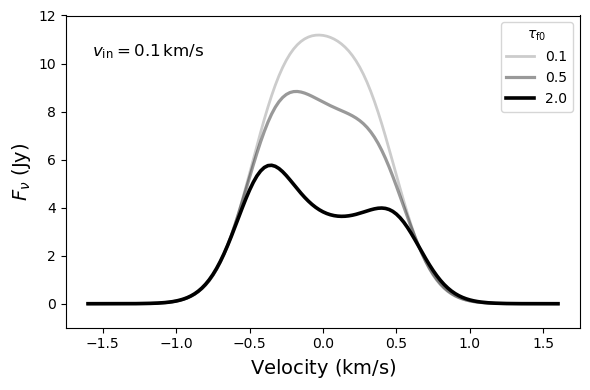

In [5]:
# question 2
plot_profile1()

In [6]:
def plot_profile2():
    Tk = 10 * u.K
    a = np.sqrt(c.k_B * Tk / (2*c.m_p))  # thermal
    sigma = 0.3                          # turbulent
    vmax = 1.6
    dv = 0.025
    v = np.arange(-vmax, vmax+dv, dv)

    T_f = 5
    T_b = 20
    tau_f = 1.5
    tau_b = 2
    v_in = 0.1

    # aperture
    theta = 10                                  # beam FWHM arcsec
    Omega = 2*np.pi*(theta/2.355)**2*2.35e-11   # solid angle in steradians
    nu0 = 97.981e9                              # CS 2-1
    
    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot(111)
    ax1.set_xlim(-1.75, 1.75)
    ax1.set_ylim(-0.5, 10.0)
    ax1.set_xlabel(r'${\rm Velocity}\ {\rm (km/s)}$', fontsize=14)
    ax1.set_ylabel(r'$F_\nu\ {\rm (Jy)}$', fontsize=14)

    Fnu = Inu(nu0, v, 0.0, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e23
    ax1.plot(v, Fnu, color='black', lw=2, ls='-', alpha=1, label='0')
    Fnu = Inu(nu0, v, 0.1, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e23
    ax1.plot(v, Fnu, color='black', lw=2, ls='-', alpha=0.4, label='0.1')
    Fnu = Inu(nu0, v, 0.2, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e23
    ax1.plot(v, Fnu, color='black', lw=2, ls='-', alpha=0.2, label='0.2')
    ax1.legend(loc=1, title=r'$v_{\rm in}$')
    ax1.text(0.06, 0.92, 'Collapsing', fontsize=13, transform=ax1.transAxes)
    #ax1.text(0.06, 0.87, r'$\tau_{\rm b} = 2$', fontsize=11, transform=ax1.transAxes)
    ax1.text(0.06, 0.87, r'$\tau_{\rm f0} = 1$', fontsize=11, transform=ax1.transAxes)

    fig.tight_layout()
    plt.savefig('infall2.pdf')

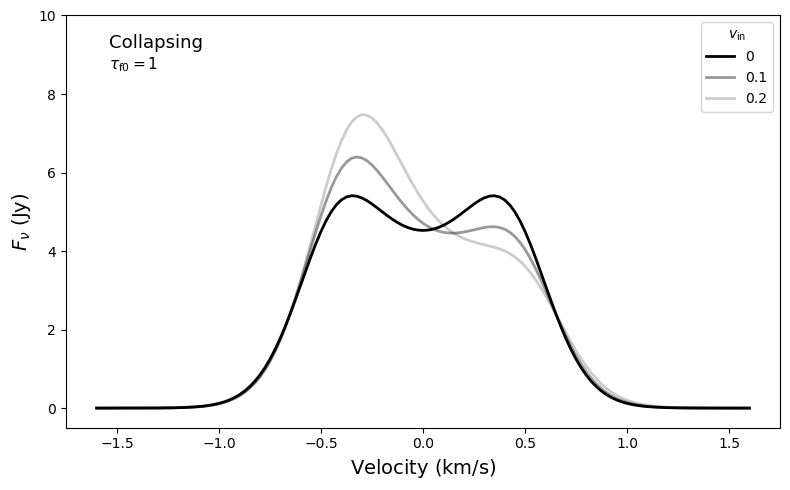

In [7]:
# question 3
plot_profile2()

In [8]:
def fake_spectra():
    vmax = 2.5
    dv = 0.025
    v = np.arange(-vmax, vmax+dv, dv)

    T_f = 5
    T_b = 20
    tau_b = 4

    # aperture
    theta = 10                                  # beam FWHM arcsec
    Omega = 2*np.pi*(theta/2.355)**2*2.35e-11   # solid angle in steradians
    nu0 = 97.981e9                              # CS 2-1

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.set_xlim(-2.3, 2.3)
    ax.set_ylim(-1.0, 10)
    ax.set_xlabel(r'${\rm Velocity}\ {\rm (km/s)}$', fontsize=14)
    ax.set_ylabel(r'$F_\nu\ {\rm (Jy)}$', fontsize=14)
    
    # fake parameters to be fit later
    tau_f = 1.7
    v_in = 0.27
    sigma = 0.4

    # noise level
    rms = 0.2

    Fnu_thick = Inu(nu0, v, v_in, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e23
    Fnu_thick = np.asarray(Fnu_thick) + np.random.normal(loc=0, scale=rms, size=v.size)
    ax.plot(v, Fnu_thick, color='black', lw=2, ls='-', alpha=1, label='thick')
    Fnu_thin = Inu(nu0, v, v_in, sigma, T_b, 0.1, T_f, 0.1) * Omega * 1e23
    Fnu_thin = np.asarray(Fnu_thin) + np.random.normal(loc=0, scale=rms, size=v.size)
    ax.plot(v, Fnu_thin, color='blue', lw=2.3, ls='-', alpha=1, label='thin')
    ax.text(0.05, 0.87, r'Fake data', fontsize=12, transform=ax.transAxes)

    fig.tight_layout()
    plt.savefig('fake_spectra.pdf')
    
    np.savetxt('collapse_spectra.txt', np.column_stack([v,Fnu_thick,Fnu_thin]), fmt='%6.2f, %8.4f, %8.4f')

    return

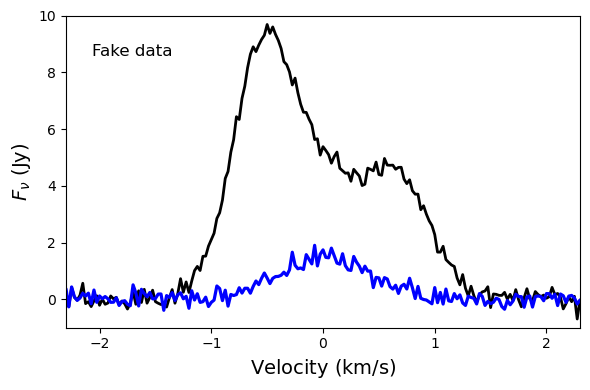

In [9]:
# create fake spectra
fake_spectra()

In [10]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-0.5*((x-mu)/sigma)**2)

def infall_profile(x, *p):
    # fixed parameters
    T_f = 5
    T_b = 20
    tau_b = 4
    
    # fitted parameters
    v_in, sigma, tau_f = p
    #v_in, sigma, tau_f, T_f, T_b, tau_b = p

    # same aperture as before implicitly assumed
    theta = 10                                  # beam FWHM arcsec
    Omega = 2*np.pi*(theta/2.355)**2*2.35e-11   # solid angle in steradians
    nu0 = 97.981e9                              # CS 2-1

    return Inu(nu0, x, v_in, sigma, T_b, tau_b, T_f, tau_f) * Omega * 1e23


def fit_spectra():
    # fitting method
    from scipy.optimize import curve_fit

    # read in data
    v, Fthick, Fthin = np.loadtxt('collapse_spectra.txt', delimiter=',', unpack=True)

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.set_xlim(-2.3, 2.3)
    ax.set_ylim(-1.0, 10)
    ax.set_xlabel(r'${\rm Velocity}\ {\rm (km/s)}$', fontsize=14)
    ax.set_ylabel(r'$F_\nu\ {\rm (Jy)}$', fontsize=14)
    
    ax.plot(v, Fthick, color='black', lw=2, ls='-', alpha=1, label='thick')
    ax.plot(v, Fthin, color='blue', lw=2, ls='-', alpha=1, label='thin')
    ax.text(0.05, 0.87, r'Fitted data', fontsize=12, transform=ax.transAxes)

    # fit gaussian to thin line, eyeballing a guess for amplitude, mean, and sigma
    p0 = [1.5, 0., 0.5]
    p, pcov = curve_fit(gauss, v, Fthin, p0=p0)
    Fthin_fit = gauss(v, *p)
    sigma = p[2]
    print('Optically thin fit sigma = {0:5.3f} km/s'.format(sigma))
    ax.plot(v, Fthin_fit, color='red', lw=5, ls='--', alpha=0.5)
    
    # fit infall profile to thick line eyeballing v_in and tau_f
    p0 = [0.3, sigma, 1]
    
    # fits remarkably well even if we let all the parameters vary and no bounds!!!
    #p0 = [0.3, sigma, 1, 5, 20, 4]
    p, pcov = curve_fit(infall_profile, v, Fthick, p0=p0)#, bounds=([0,0.9*sigma,0],[2,1.1*sigma,5]))
    Fthick_fit = infall_profile(v, *p)
    v_in = p[0]
    print(f'Infall speed = {v_in:5.3f} km/s')
    ax.plot(v, Fthick_fit, color='red', lw=5, ls='--', alpha=0.5)
    
    #fig.tight_layout()
    #plt.savefig('fake_spectra.pdf')

    return

Optically thin fit sigma = 0.409 km/s
Infall speed = 0.263 km/s


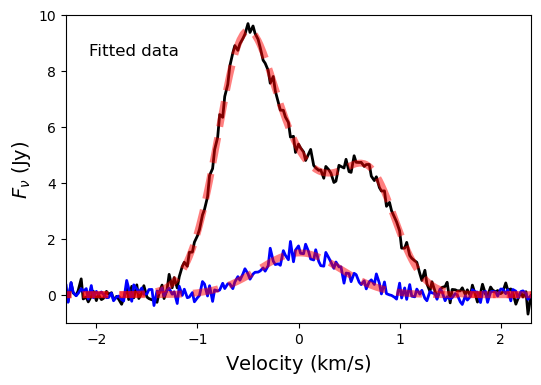

In [11]:
# question 4
fit_spectra()